In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv")

In [4]:
df.to_csv("placement.csv",index=False)

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt

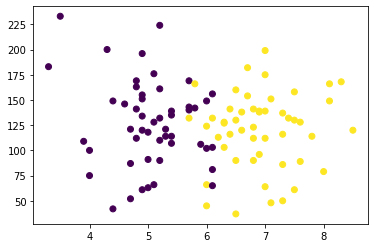

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [23]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

1.0

In [27]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


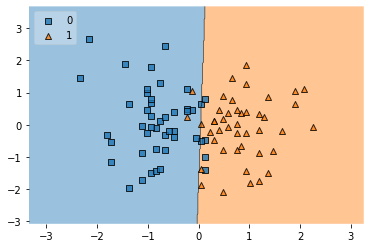

In [28]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))